<h1> Nous sommes PDG de Warner et nous réfléchissons au prochain film dans lequel nous souhaitons investir</h1>

In [149]:
# Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
import seaborn as sns
from sklearn import linear_model

%matplotlib inline



In [150]:
# Mise en forme

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)
plt.close("all")

sns.set_context("poster")
sns.set_palette("colorblind")
sns.axes_style()
sns.set_style({'legend.frameon': True})
color_blind_list = sns.color_palette("colorblind", 8)
my_orange = color_blind_list[2]
my_green = color_blind_list[1]


<h1><FONT color="red">I. Un film, est-bien sérieux ? </FONT></h1>

<function matplotlib.pyplot.show>

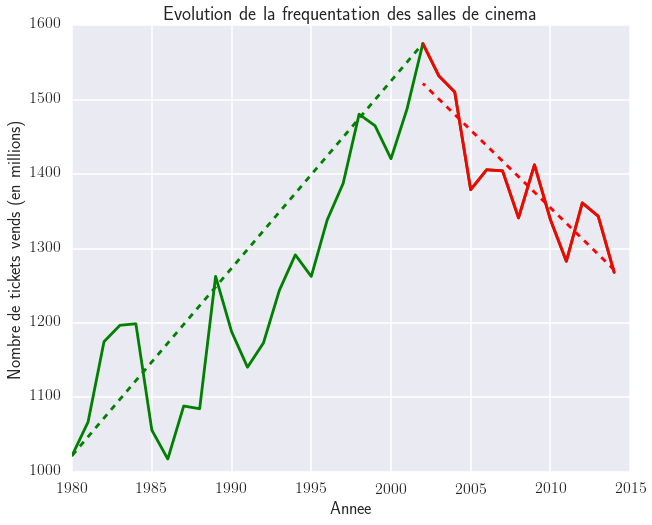

In [151]:


# source: https://www.quandl.com/data/MOJO/BOXOFFICE_A-Yearly-Box-Office
data_movie_path='/Users/williambenhaim/Desktop/TelecomParisTech/P2/ProjetKitDataScience/MOJO-BOXOFFICE_A.csv'
movie=pd.read_csv(data_movie_path, sep=",",encoding="utf-8")
movie['newYear']= list(map(lambda x: x.split('-')[0], movie['Year']))
#plt.plot(movie['newYear'],movie['Total Gross'])
plt.figure()
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(movie['newYear'],movie['Tickets Sold'],color='green', linestyle="-")
plt.plot(movie['newYear'][:13],movie['Tickets Sold'][:13],color='red', linestyle="-")
#plt.plot([2002,2014],[1575.7,1268.1],color='red', linestyle="--")
plt.plot([1980,2002],[1022.0,1575.7],color='green', linestyle="--")
plt.xlabel('Annee')
plt.ylabel('Nombre de tickets vends (en millions)')
plt.title("Evolution de la frequentation des salles de cinema") 


freq_1980 = 1022.0
freq_2002 = 1268.1
freq_2014 = 1575.7
coef_until_2002 =  1575.7/1022.0
coef_since_2002 = -1575.7/1268.1

#Regression linéaire pour prédire la tendance
x = movie['newYear'][:13]
y = movie['Tickets Sold'][:13]
regr = linear_model.LinearRegression()
regr.fit(x[:,np.newaxis], y)

plt.plot(x, regr.predict(x[:,np.newaxis]), color='red', linestyle="--")

baisse_since_2002 = (freq_2002 - freq_2014) / freq_2002
plt.show




<h2 color = red><FONT color="red"><center> La frequentation des salles de cinéma a baissé de  24 pourcents depuis 2002 !!</FONT></center></h2>

<h1><FONT color="blue"> Pourquoi pas plutôt une série ?</FONT></h1>

<h2> - Vent en poupe </h2>
<h2> - Partenariat avec Netflix </h2>
<h2> - Savoir faire : Hbo  </h2>
<h2> - Focus Gotham </h2>


<h2><FONT color="blue">  Reconquerir le marché des '15-34': </FONT></h2>

<function matplotlib.pyplot.show>

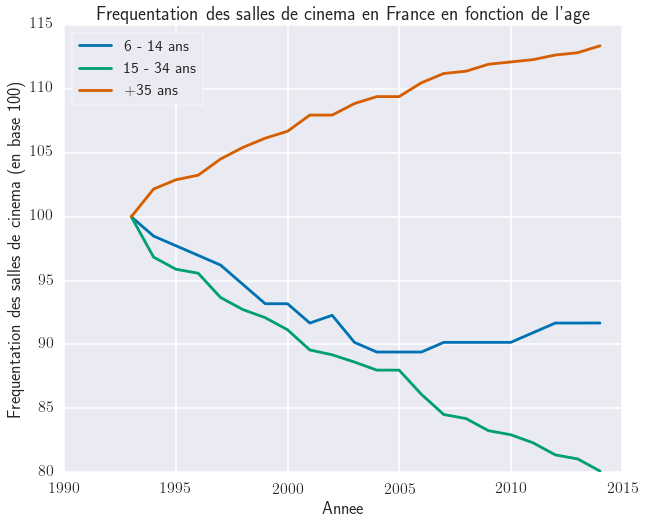

In [152]:
# source: http://www.cnc.fr/web/fr/statistiques
data_frequentation_path="/Users/williambenhaim/Desktop/TelecomParisTech/P2/ProjetKitDataScience/DemographieCinema_cnc.csv"
frequentation = pd.read_csv(data_frequentation_path, sep=",",encoding="utf-8", )
frequentation_df = pd.DataFrame(frequentation)

plt.figure()
fig, ax = plt.subplots(figsize=(10, 8))

data_freq = frequentation_df.transpose()
data_freq = data_freq.reset_index()

p1 = plt.plot(data_freq['index'],data_freq[0],label = "6 - 14 ans" )
p2 = plt.plot(data_freq['index'],data_freq[1],label = "15 - 34 ans")
p3 = plt.plot(data_freq['index'],data_freq[2],label = "+35 ans")
plt.legend(loc='upper left')
plt.xlabel('Annee')
plt.ylabel('Frequentation des salles de cinema (en base 100)')
plt.title("Frequentation des salles de cinema en France en fonction de l'age") 
plt.show
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
#plt.legend(handles=[p1, p2, p3])
#plt.legend([p1, p2, p3], ["6 - 14 ans", "15 - 34 ans", "35 ans et plus"])

<h1><FONT color="blue"> II. Comment s'assurer le succès ? </FONT></h1>


<h2> a.) Quel genre ? </h2>
<h2> b.) Quels acteurs ?  </h2>
<h2> c.) Quel réalisateur ? </h2>

In [ ]:
# Crawling de IMDB pour récupérer des informations sur acteurs, genres, réalisateurs, des séries les plus populaires

import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def GetSoupFromUrl(url):
    request = requests.get(url)
    return BeautifulSoup(request.text, 'html.parser')

def infoTvshow(url):

    soup = GetSoupFromUrl(url)
    bloc_tvshow= soup.find('table', { 'id' : 'title-overview-widget-layout' })
    tvshows= bloc_tvshow.find('td', { 'id' : 'overview-top' })
    #creators= tvshows.find('div', { 'itemprop' : 'creator' }).text.split('\n')[2:]
    if not tvshows.find('div', { 'itemprop' : 'creator' }) is None:
        creators=map(lambda y: y.split(',')[0],tvshows.find('div', { 'itemprop' : 'creator' }).text.split('\n')[2:])[:-1]
    else:
        creators=[]
    if not tvshows.find('div', { 'itemprop' : 'actors' }) is None:
        actors=map(lambda y: y.split(',')[0],map(lambda x: x.split('\n'),tvshows.find('div', { 'itemprop' : 'actors' }).text.split('|')[:1])[0][2:])
    else:
        actors=[]
    return creators,actors

def bestTvshow():
    title=[]
    year=[]
    genre=[]
    time=[]
    urls=[]
    actor=[]
    creator=[]
    for i in range(1,501,50):
        
        url='http://www.imdb.com/search/title?start='+str(i)+'&title_type=tv_series'
 
        soup = GetSoupFromUrl(url)
        bloc_tvshow= soup.find('table', { 'class' : 'results' })
        tvshows= bloc_tvshow.findAll('tr')


        for tvshow in tvshows:
            #print note.find('strong')['title']

            tvs=tvshow.findAll('td', { 'class' : 'title' })


            for tv in tvs:

                if not (tv.find('a') is None or tv.find('span', { 'class' : 'year_type' }) is None 
                        or tv.find('span', { 'class' : 'genre' }) is None or tv.find('span', { 'class' : 'runtime' }) is None
                        or tv.find('a') is None):

                    urls.append('http://www.imdb.com/'+tv.find('a')['href'])
                    title.append(tv.find('a').text)
                    year.append(tv.find('span', { 'class' : 'year_type' }).text.split(' ')[0][1:5])
                    genre.append(tv.find('span', { 'class' : 'genre' }).text.split('|'))
                    time.append(tv.find('span', { 'class' : 'runtime' }).text.split(' ')[0])
                    creator.append(infoTvshow('http://www.imdb.com/'+tv.find('a')['href'])[0])
                    actor.append(infoTvshow('http://www.imdb.com/'+tv.find('a')['href'])[1])

                    
    year = pd.DataFrame(year,columns=['year'])
    title=pd.DataFrame(title,columns=['title'])
    genre=pd.DataFrame(genre)
    actor=pd.DataFrame(actor)
    creator=pd.DataFrame(creator)
    urls=pd.DataFrame(urls,columns=['url'])
    time=pd.DataFrame(time,columns=['time'])
   
    
    result = pd.concat([title,creator,actor,time,year,genre], axis=1)
    return result

res_bestTvshow=[]
res_bestTvshow=bestTvshow()

res_bestTvshow.columns=(['title','creator1','creator2','creator3','creator4','creator5','creator6','creator7','creator8','creator9','creator10','creator11','actor1','actor2','actor3','time','year','genre1','genre2','genre3','genre4','genre5','genre6','genre7','genre8','genre9','genre10'])

res_bestTvshow.to_csv('resultsallTvShow.csv',encoding='utf8')



In [143]:
# source: IMDB
data_imdb_path='/Users/williambenhaim/Desktop/TelecomParisTech/P2/ProjetKitDataScience/resultsallTvShow.csv'
imdb = pd.read_csv(data_imdb_path, sep=",",encoding="utf-8", )
imdb_df = pd.DataFrame(imdb)

imdb_df = imdb_df.fillna('Na')
imdb_df['count']=np.ones(imdb_df.shape[0])
for col in  ['genre1','genre2','genre3','creator1','creator2','actor1','actor2','actor3']:
    imdb_df[col]=imdb_df[col].map(lambda x: x.lstrip(' ').rstrip(' '))

def mostpopularindex(typeindex):   

    gb=imdb_df.groupby(imdb_df[typeindex])
    imdb_df1=gb.sum().astype('int')

    bestindex= imdb_df1.reset_index()[[typeindex,'count']]
    
    return bestindex.sort('count', ascending=False)[bestindex[typeindex] !='Na']


<h2><FONT color="blue"> a.) Choix du genre : </FONT></h2>

/Users/williambenhaim/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


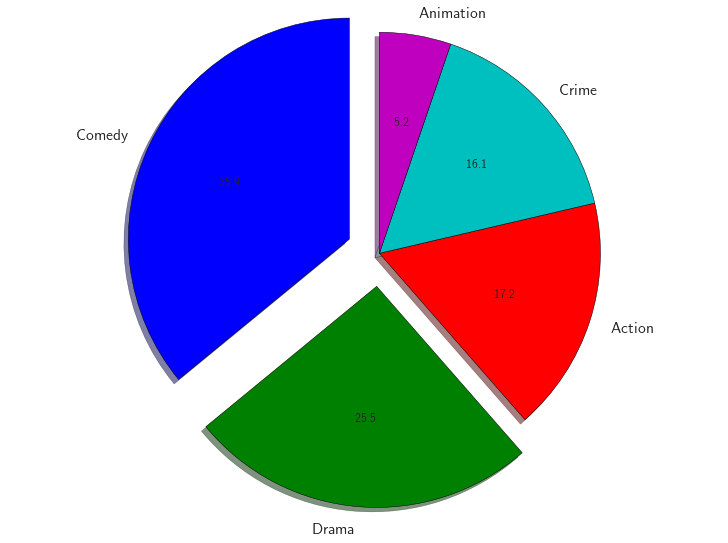

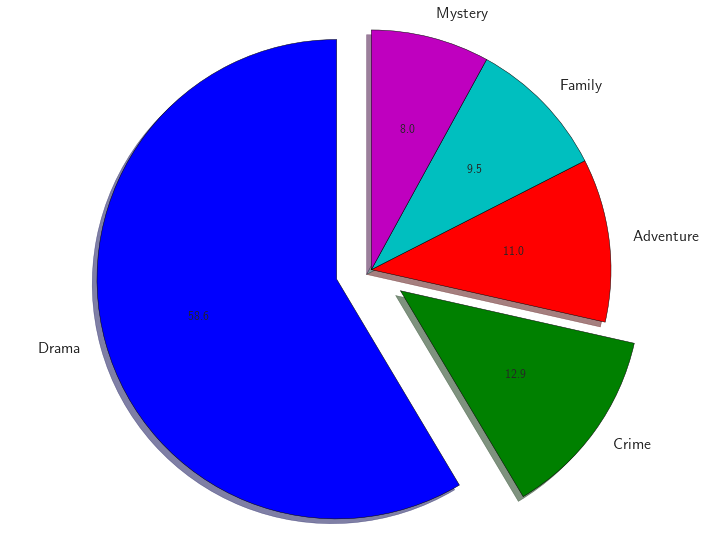

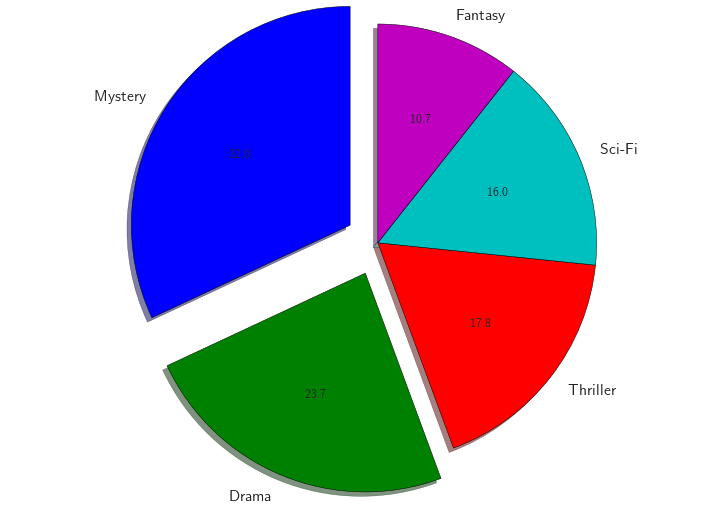

In [144]:
def camembertindex(index):
    name = [x for x in mostpopularindex(index)[index][:5]]
    data =  [x for x in mostpopularindex(index)['count'][:5]]

    explode=(0.15, 0.15, 0, 0,0)
    plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
    plt.axis('equal')
    plt.show()
    
for index in  ['genre1','genre2','genre3']:
    camembertindex(index)

<h2><FONT color="blue"> b.) Choix des acteurs : </FONT></h2>

In [145]:
for index in  ['actor1','actor2','actor3']:
    print mostpopularindex(index)[:5]
    print '****'


                actor1  count
97      David Duchovny      4
119         Ed O'Neill      2
111       Dominic West      2
320  Melissa Joan Hart      2
433   Timothy Olyphant      2
****
                actor2  count
309     Martin Freeman      3
460  Vincent D'Onofrio      2
328     Michael Landon      2
438   Taraji P. Henson      2
32       Austin Butler      2
****
                  actor3  count
261          Katey Sagal      3
407  Sarah Wayne Callies      2
177          Hill Harper      2
256     KaDee Strickland      2
339        Mitch Pileggi      2
****


/Users/williambenhaim/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


<h2><FONT color="blue"> c.) Choix de l'équipe de réalisation' : </FONT></h2>

In [147]:
for index in  ['creator1','creator2','creator3']:
    print mostpopularindex(index)[:5]
    print '****'


           creator1  count
94      Darren Star      4
352   Shonda Rhimes      3
25      Ann Donahue      3
277  Michael Brandt      3
88    Dan Schneider      3
****
             creator2  count
28   Carol Mendelsohn      3
5       Alex Kurtzman      3
55         Derek Haas      3
126      Miles Millar      2
23        Brad Wright      2
****
             creator3  count
5   Anthony E. Zuiker      3
56       Roberto Orci      2
44      Matt Olmstead      2
3    Andrew Kreisberg      2
57        Ryan Murphy      2
****


/Users/williambenhaim/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


<h1><FONT color="blue"> CONCLUSION: </FONT></h1>

Après une étude de notre dataLab, nous avons décidé de lancer une nouvelle série, très prometteuse, avec pour acteur principal "David Duchovny", secondé par "Martin Freeman" et "Katey Sagal". Cette série sera un savant mélange de Dram, Comedy, avec une pointe de Crime.
Nous avons choisi pour l'équipe de réalisation d'associer Darren Star, Carol Mendelsohn et Anthony E. Zuiker.

Sortie prévue début 2017… A vos Netflix wink emoticon

In [ ]:
def infoTvshow(url):

    soup = GetSoupFromUrl(url)
    bloc_tvshow= soup.find('table', { 'id' : 'title-overview-widget-layout' })
    tvshows= bloc_tvshow.find('td', { 'id' : 'overview-top' })
    #creators= tvshows.find('div', { 'itemprop' : 'creator' }).text.split('\n')[2:]
    if not tvshows.find('div', { 'itemprop' : 'creator' }) is None:
        creators=map(lambda y: y.split(',')[0],tvshows.find('div', { 'itemprop' : 'creator' }).text.split('\n')[2:])[:-1]
    else:
        creators=[]
    if not tvshows.find('div', { 'itemprop' : 'actors' }) is None:
        actors=map(lambda y: y.split(',')[0],map(lambda x: x.split('\n'),tvshows.find('div', { 'itemprop' : 'actors' }).text.split('|')[:1])[0][2:])
    else:
        actors=[]
    return creators,actors